<a href="https://colab.research.google.com/github/wantepim84/NetworkX/blob/main/NetworkXCh4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Addiliation networks in NetworkX
# Import bipartite module
from networkx.algorithms import bipartite
from networkx import NetworkXError
# Load Zachary karate network
G = nx.karate_club_graph()
try:
    # Find and print node sets
    left, right = bipartite.sets(G)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    # Not an affiliation network
    print(e)

Graph is not bipartite.


In [ ]:
#Code the change karate club network into an affiliation network
B = nx.Graph()
B.add_edges_from([(v, (v, w)) for v, w in G.edges])
B.add_edges_from([(w, (v, w)) for v, w in G.edges])
try:
    # Find and print node sets
    left, right = bipartite.sets(B)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    # Not an affiliation network
    print(e)

Left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

Right nodes
 {(13, 33), (29, 32), (3, 13), (5, 10), (23, 25), (0, 5), (15, 32), (2, 32), (23, 27), (0, 7), (14, 33), (1, 17), (8, 32), (31, 33), (20, 33), (23, 29), (1, 19), (2, 27), (0, 2), (5, 16), (22, 32), (1, 3), (1, 21), (1, 30), (25, 31), (3, 12), (23, 33), (27, 33), (2, 13), (24, 25), (29, 33), (14, 32), (1, 7), (3, 7), (4, 6), (31, 32), (18, 32), (20, 32), (0, 11), (2, 8), (30, 33), (8, 33), (19, 33), (26, 29), (5, 6), (1, 2), (0, 4), (0, 13), (0, 31), (2, 28), (4, 10), (0, 6), (2, 3), (1, 13), (28, 31), (24, 27), (15, 33), (26, 33), (0, 8), (0, 17), (28, 33), (8, 30), (32, 33), (0, 1), (0, 10), (2, 7), (0, 19), (30, 32), (6, 16), (24, 31), (18, 33), (0, 3), (22, 33), (23, 32), (0, 12), (2, 9), (0, 21), (9, 33)}


In [ ]:
# Find out whether a network is an affiliation network (use 'is_bipartite()' function)
bipartite.is_bipartite(B)

True

In [ ]:
open('polinator.txt','w')

<_io.TextIOWrapper name='polinator.txt' mode='w' encoding='UTF-8'>

In [ ]:
# Create data directory path
from pathlib import Path
data_dir = Path('/content/polinator.txt')
B = nx.Graph()
with open(data_dir) as f:
    # Skip header row
    next(f)
    for row in f:
        # Break row into cells
        cells = row.strip().split('\t')
        # Get plant species and pollinator species
        plant = cells[4].replace('_', '\n')
        pollinator = cells[8].replace('_', '\n')
        B.add_edge(pollinator, plant)
        # Set node types
        B.nodes[pollinator]["bipartite"] = 0
        B.nodes[plant]["bipartite"] = 1
# Only consider connected species
B = B.subgraph(list(nx.connected_components(B))[0])

In [ ]:
# Get node sets
pollinators = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
plants = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

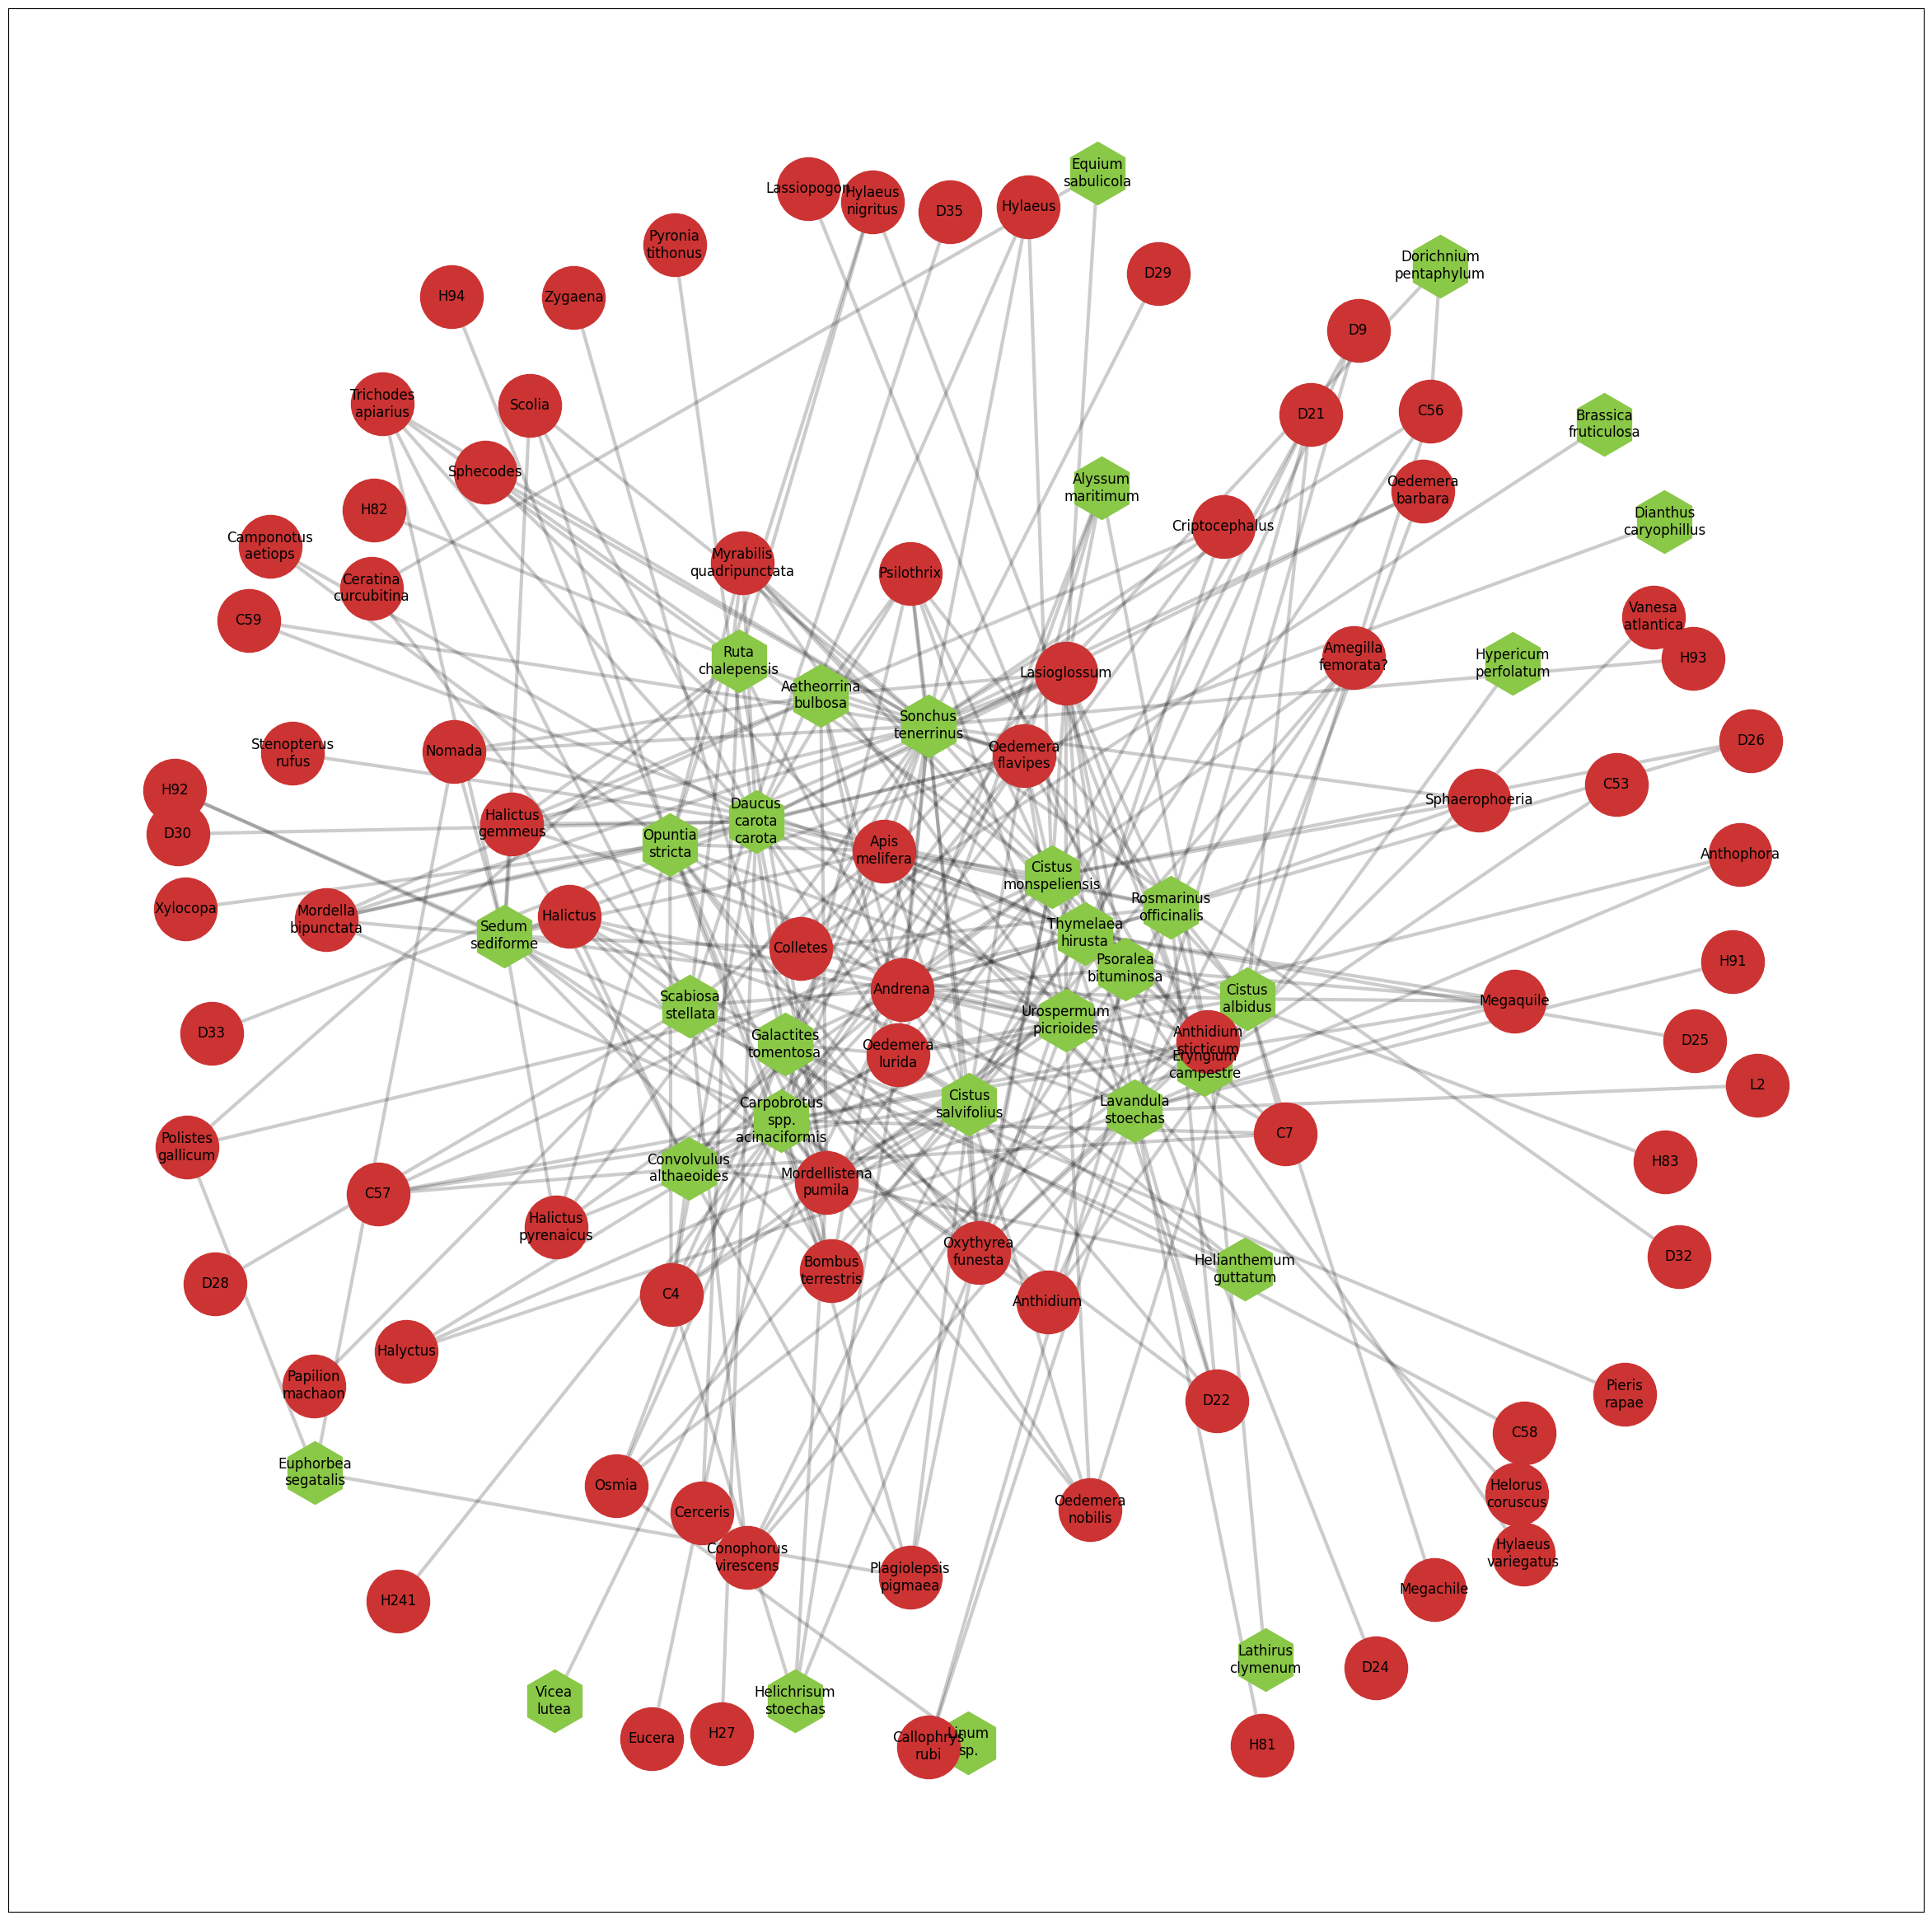

In [ ]:
# Visualisation of pollinator network
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(B, k=0.9)
# Draw using different shapes and colors for plant/pollinators
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, nodelist=plants, node_color="#8AC847", node_shape="h", node_size=3000)
nx.draw_networkx_nodes(B, pos, nodelist=pollinators, node_color="#CC3333", node_size=3000)
nx.draw_networkx_labels(B, pos)
plt.savefig('output-4.1.png', dpi=150)

{'Urospermum\npicrioides': Text(0.2664862802954042, -0.24333175908269225, 'Urospermum\npicrioides'),
 'Sonchus\ntenerrinus': Text(0.16105676380575085, -0.2088015650511525, 'Sonchus\ntenerrinus'),
 'Lavandula\nstoechas': Text(-0.02763948052521746, 0.11778394894140776, 'Lavandula\nstoechas'),
 'Aetheorrina\nbulbosa': Text(-0.019530083568939774, 0.27144200678197017, 'Aetheorrina\nbulbosa'),
 'Euphorbea\nsegatalis': Text(0.3693049576003018, 0.5679391230938908, 'Euphorbea\nsegatalis'),
 'Convolvulus\nalthaeoides': Text(0.12080620086368696, 0.2637235486660195, 'Convolvulus\nalthaeoides'),
 'Carpobrotus\nspp.\nacinaciformis': Text(-0.3295925377317297, -0.08786283531580964, 'Carpobrotus\nspp.\nacinaciformis'),
 'Equium\nsabulicola': Text(0.5484221787763208, 0.3105389166755059, 'Equium\nsabulicola'),
 'Daucus\ncarota\ncarota': Text(-0.18232778166517852, 0.14627170532805703, 'Daucus\ncarota\ncarota'),
 'Eryngium\ncampestre': Text(-0.10609050561130476, 0.37439963067296045, 'Eryngium\ncampestre'),

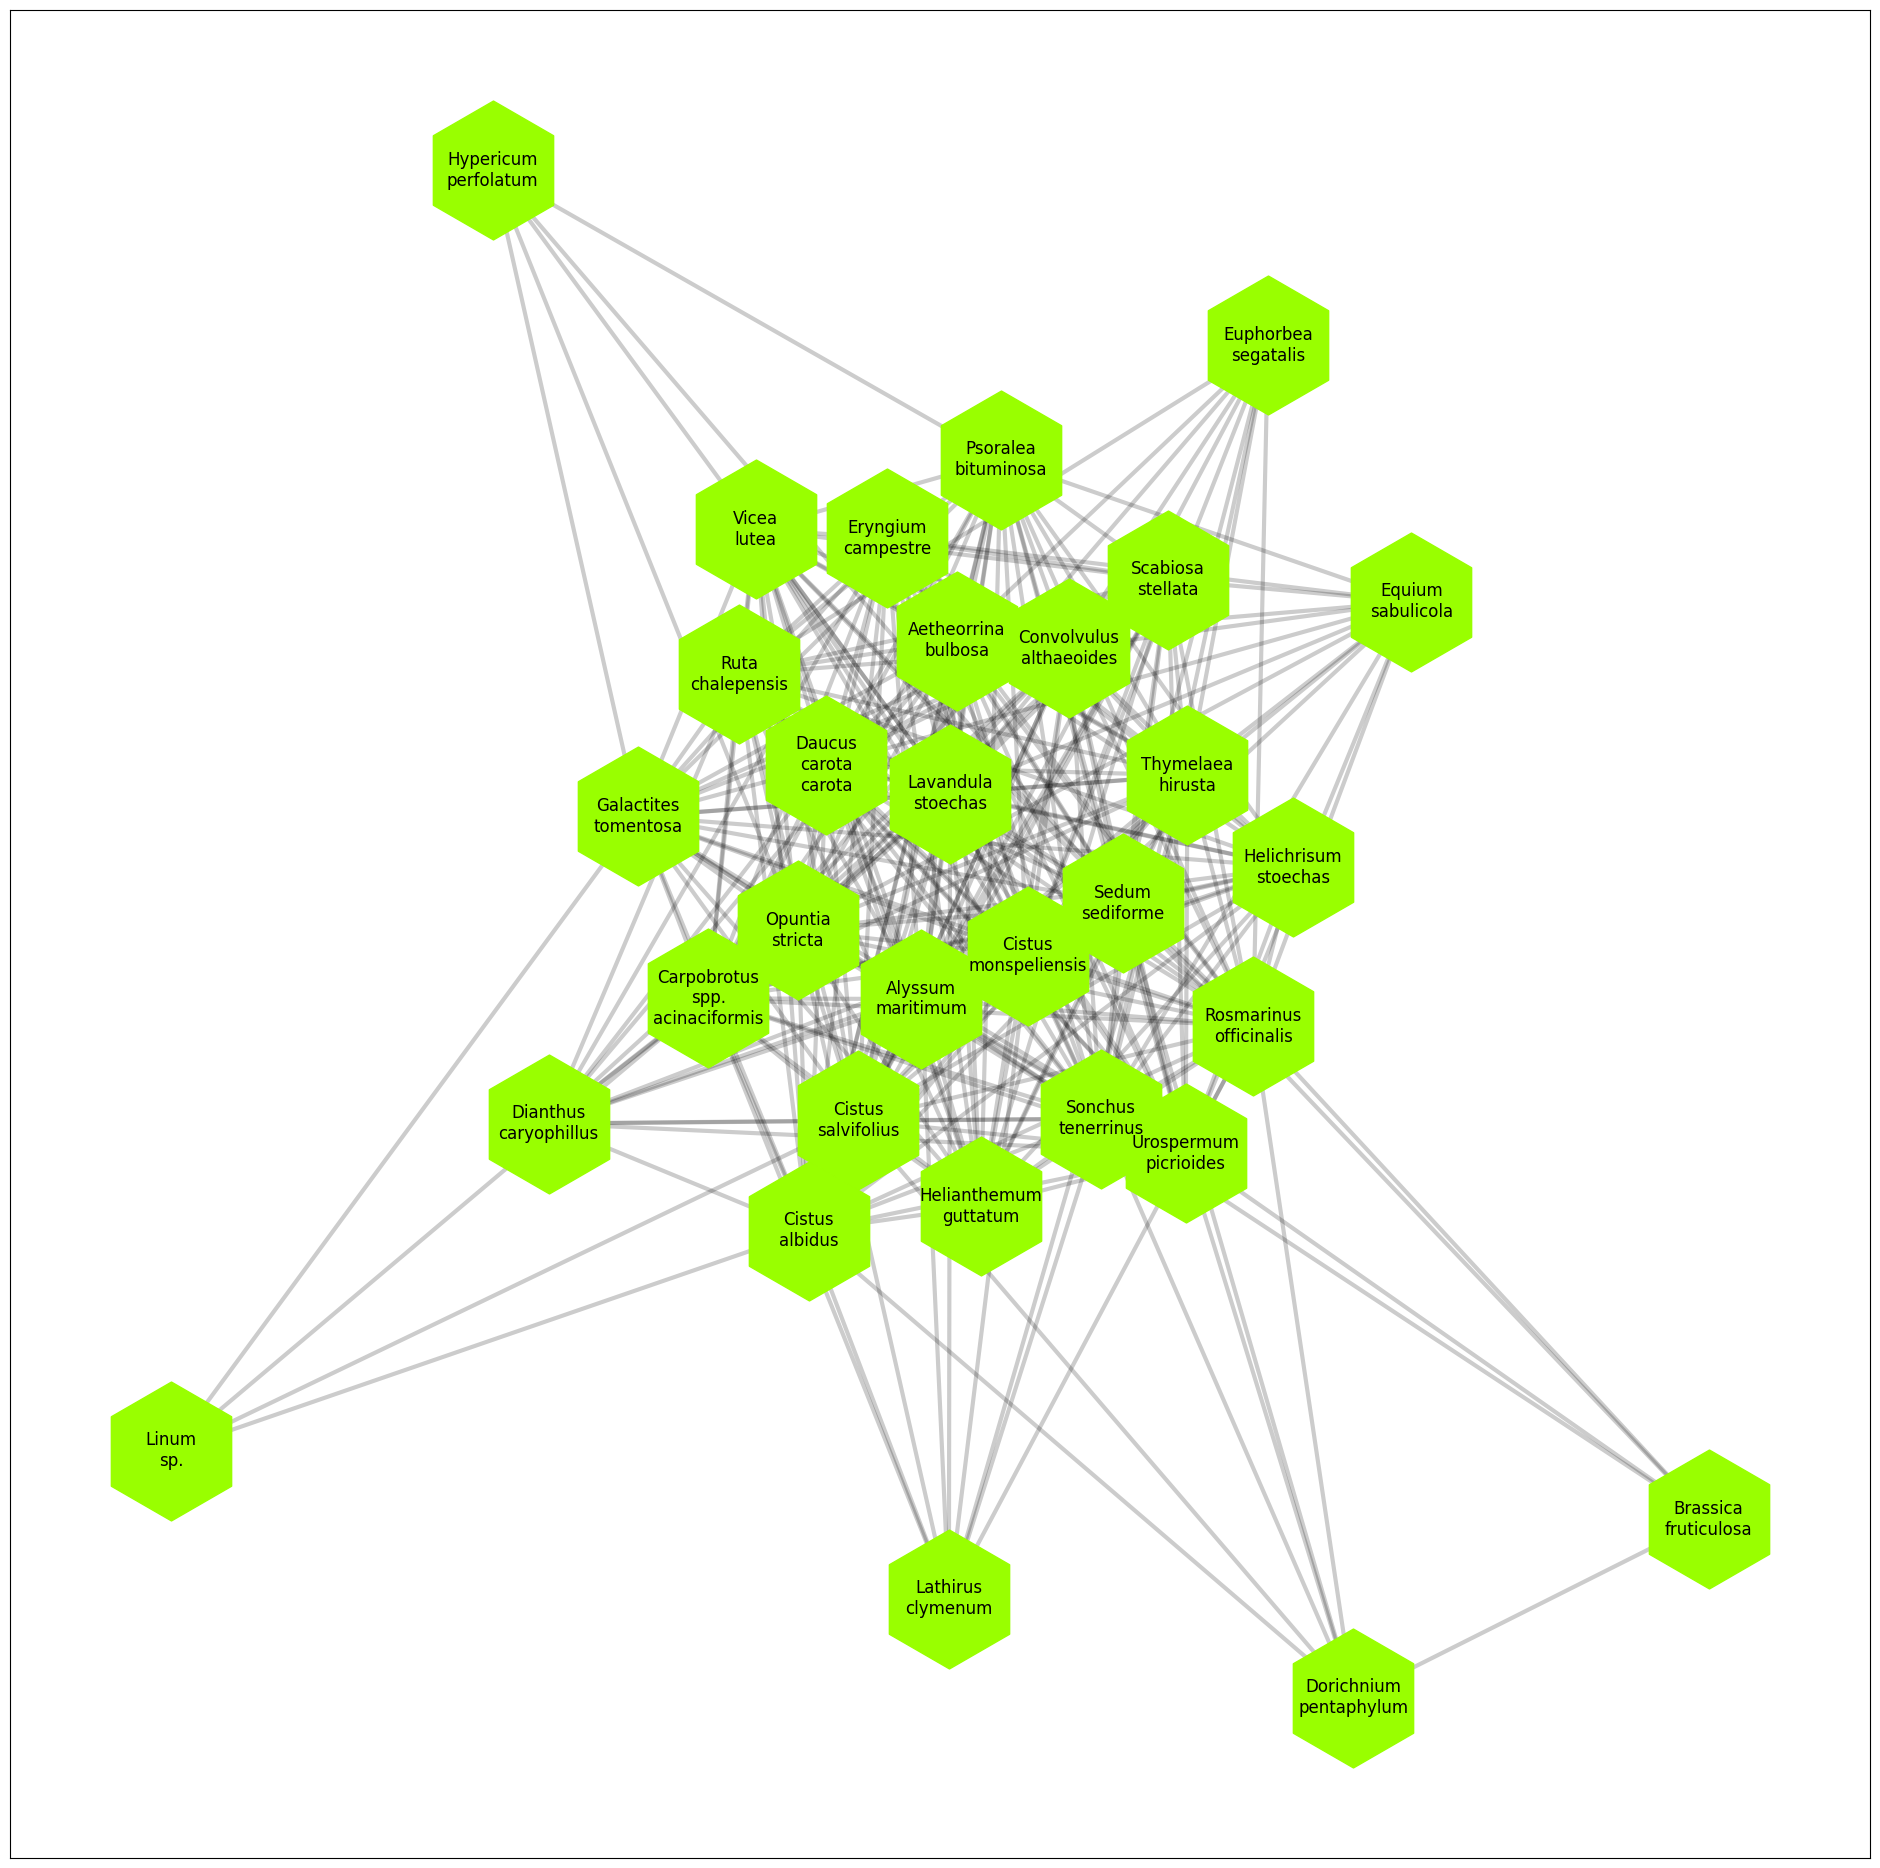

In [ ]:
# Projections
# Create co-affiliation network
G = bipartite.projected_graph(B, plants)
# Create figure
plt.figure(figsize=(24,24))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#99FF00", node_shape="h",
node_size=10000)
nx.draw_networkx_labels(G, pos)

{'Oedemera\nflavipes': Text(0.08359475063590988, -0.1858981520966241, 'Oedemera\nflavipes'),
 'Anthidium\nsticticum': Text(0.03796940155777908, 0.030166512808719407, 'Anthidium\nsticticum'),
 'Oedemera\nlurida': Text(0.248819884727451, 0.04582590409394169, 'Oedemera\nlurida'),
 'Psilothrix': Text(0.26498281389072276, -0.06786491501289484, 'Psilothrix'),
 'Criptocephalus': Text(0.44206238429636857, 0.020980760124949465, 'Criptocephalus'),
 'Megaquile': Text(-0.08272197862326489, 0.20835597671121955, 'Megaquile'),
 'Amegilla\nfemorata?': Text(-0.057606598794078145, 0.39194047111397434, 'Amegilla\nfemorata?'),
 'Andrena': Text(-0.06928318625328438, -0.02707329336909405, 'Andrena'),
 'Apis\nmelifera': Text(-0.038841554223980924, 0.05409810688741886, 'Apis\nmelifera'),
 'Polistes\ngallicum': Text(-0.43132351257916096, -0.3387250696330559, 'Polistes\ngallicum'),
 'L2': Text(-0.38522202069555744, 0.6042133575759525, 'L2'),
 'C7': Text(0.44407815787793403, -0.13469390718635468, 'C7'),
 'Lasiog

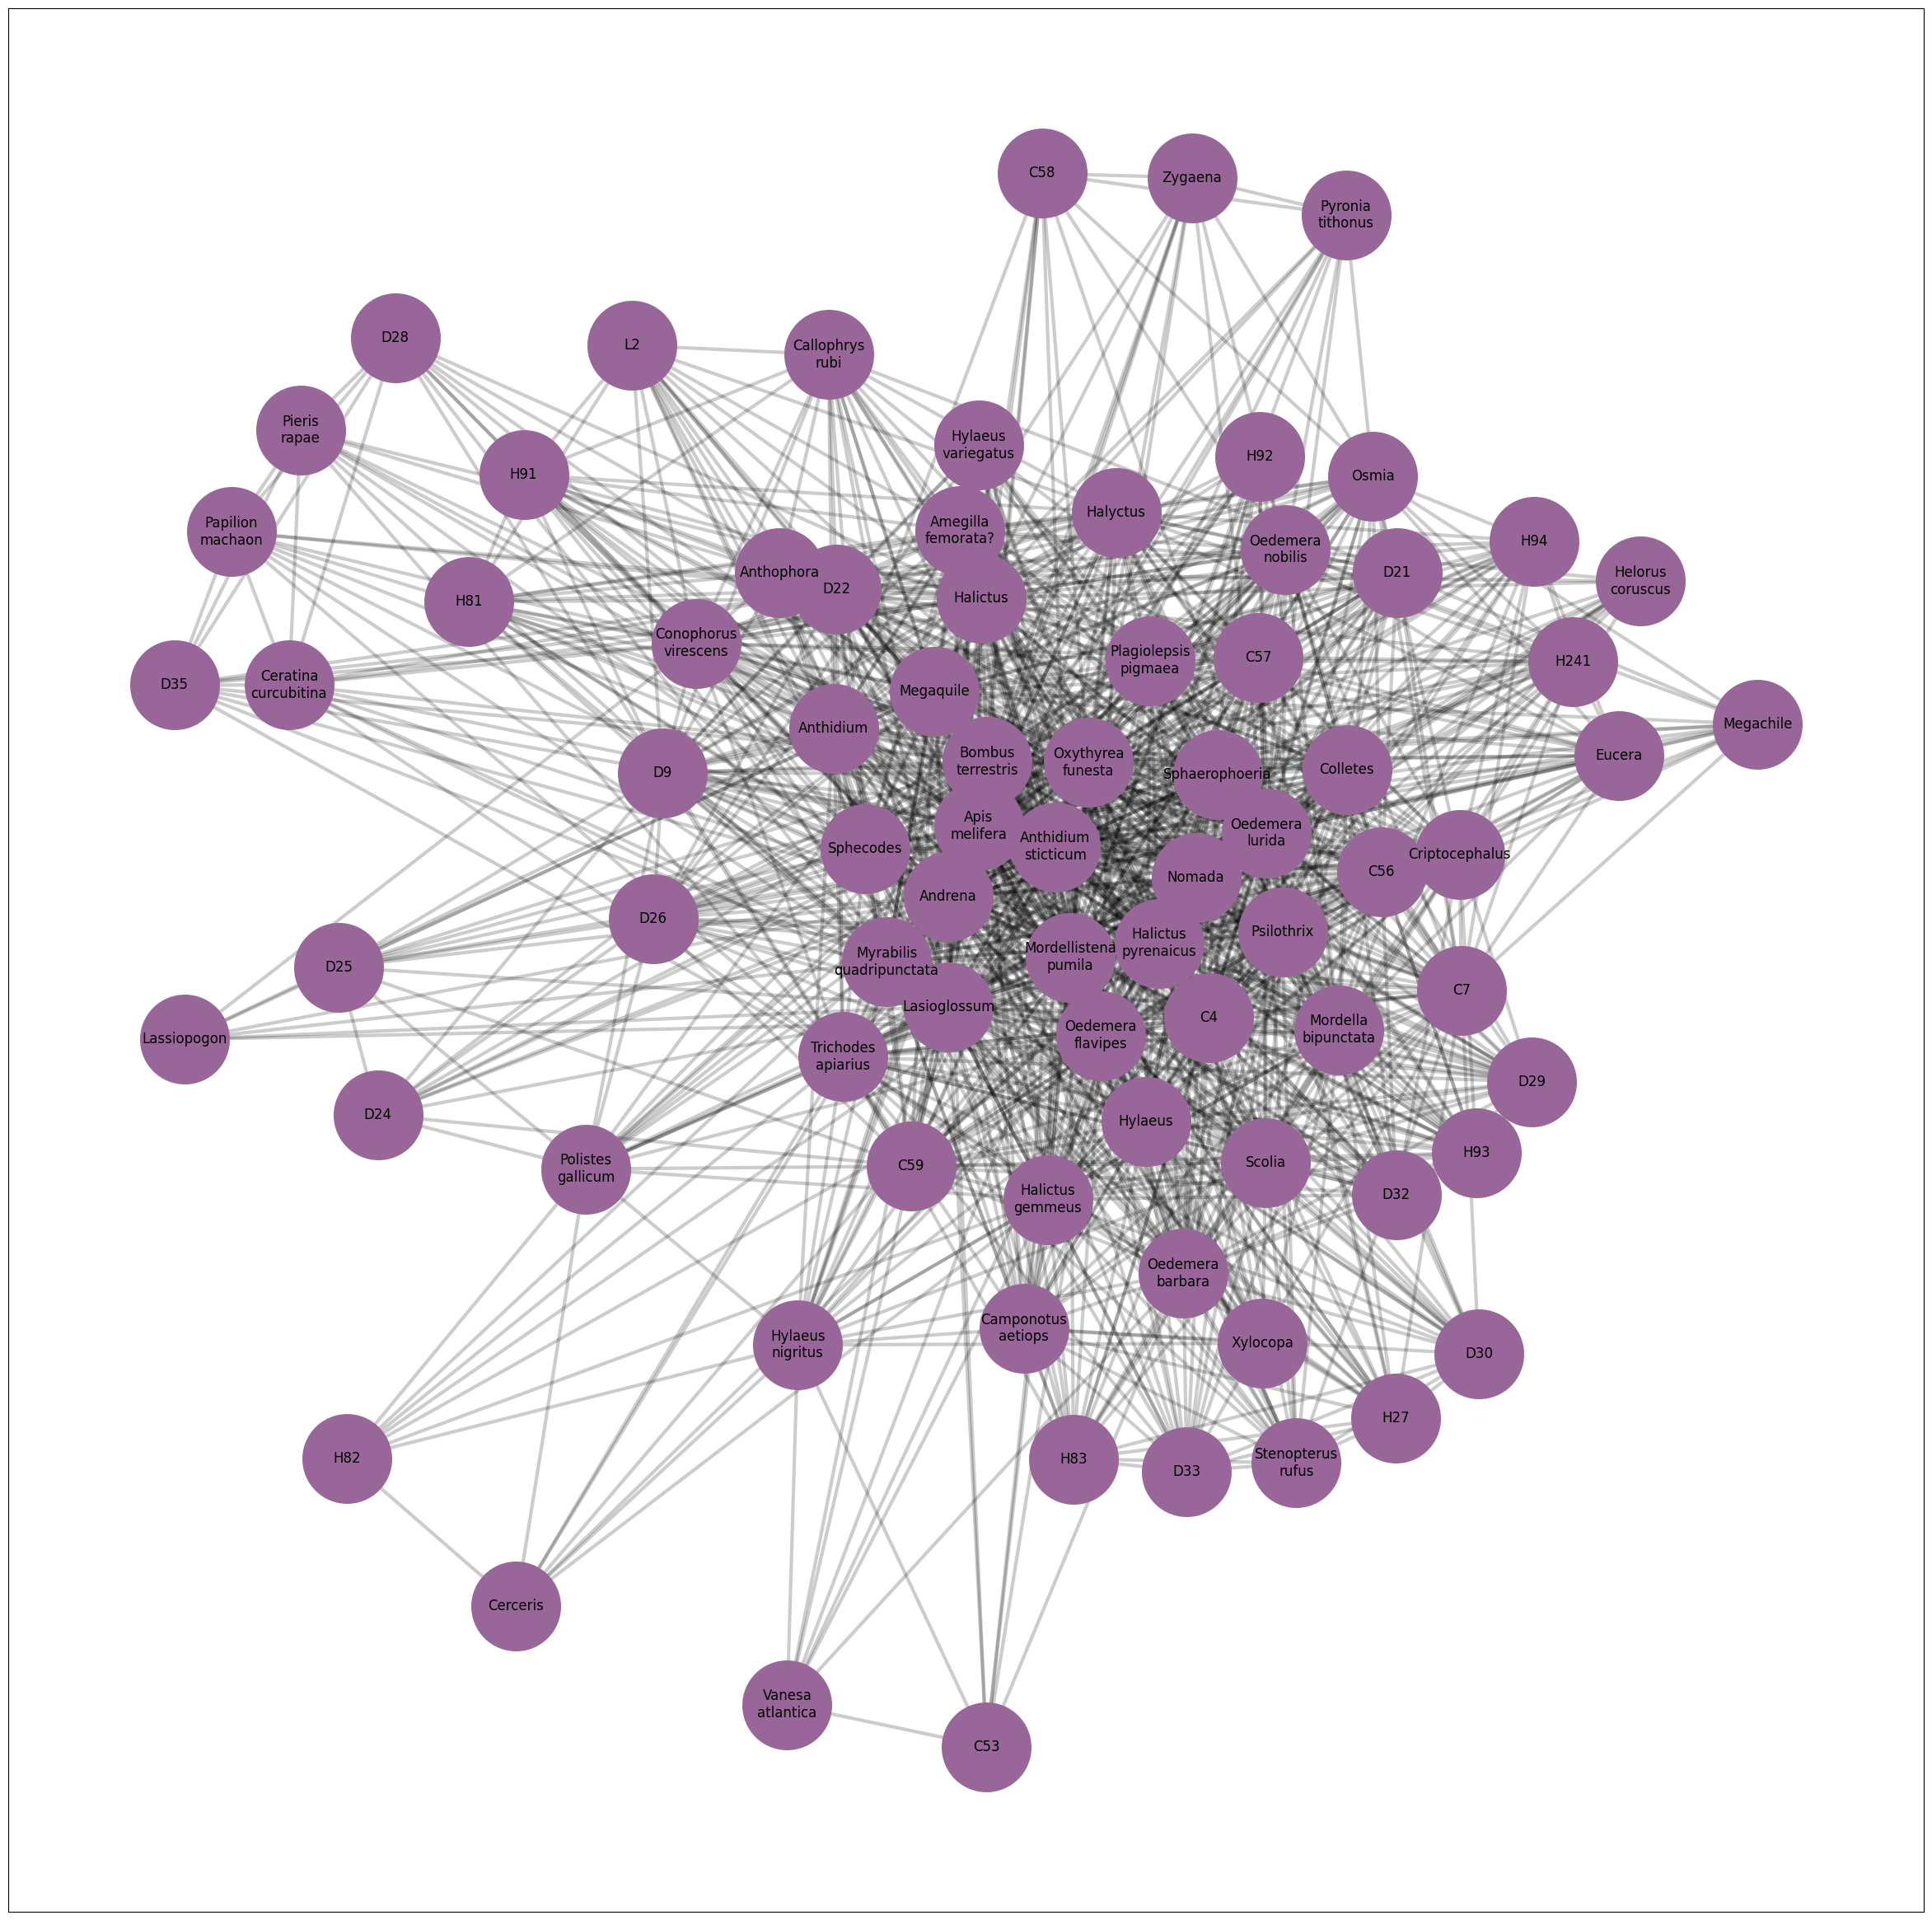

In [ ]:
# project the pollinator network onto the pollinators instead of the plants
# Create co-affiliation network
G = bipartite.projected_graph(B, pollinators)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#996699", node_size=6000)
nx.draw_networkx_labels(G, pos)

In [ ]:
G = bipartite.weighted_projected_graph(B, plants)
list(G.edges(data=True))[0]

('Urospermum\npicrioides', 'Helichrisum\nstoechas', {'weight': 3})

{'Oedemera\nflavipes': Text(0.21917937586461994, 0.056908111161495564, 'Oedemera\nflavipes'),
 'Anthidium\nsticticum': Text(-0.07982077465810043, 0.01637806758348502, 'Anthidium\nsticticum'),
 'Oedemera\nlurida': Text(0.21963237508767983, -0.04793616096355273, 'Oedemera\nlurida'),
 'Psilothrix': Text(0.27871526880605435, 0.0003535216919999387, 'Psilothrix'),
 'Criptocephalus': Text(0.151294273693204, -0.00020984818709877208, 'Criptocephalus'),
 'Megaquile': Text(-0.15976168977579705, 0.3401154885075015, 'Megaquile'),
 'Amegilla\nfemorata?': Text(0.16837607790568568, 0.21175325001229986, 'Amegilla\nfemorata?'),
 'Andrena': Text(-0.027780560224204446, -0.04043645889950936, 'Andrena'),
 'Apis\nmelifera': Text(-0.0747097107163979, -0.09749544548094338, 'Apis\nmelifera'),
 'Polistes\ngallicum': Text(-0.6429126883925045, -0.020999170005075864, 'Polistes\ngallicum'),
 'L2': Text(0.3516809067834562, 0.5032324023879442, 'L2'),
 'C7': Text(0.3842503214717498, 0.132846075224539, 'C7'),
 'Lasioglo

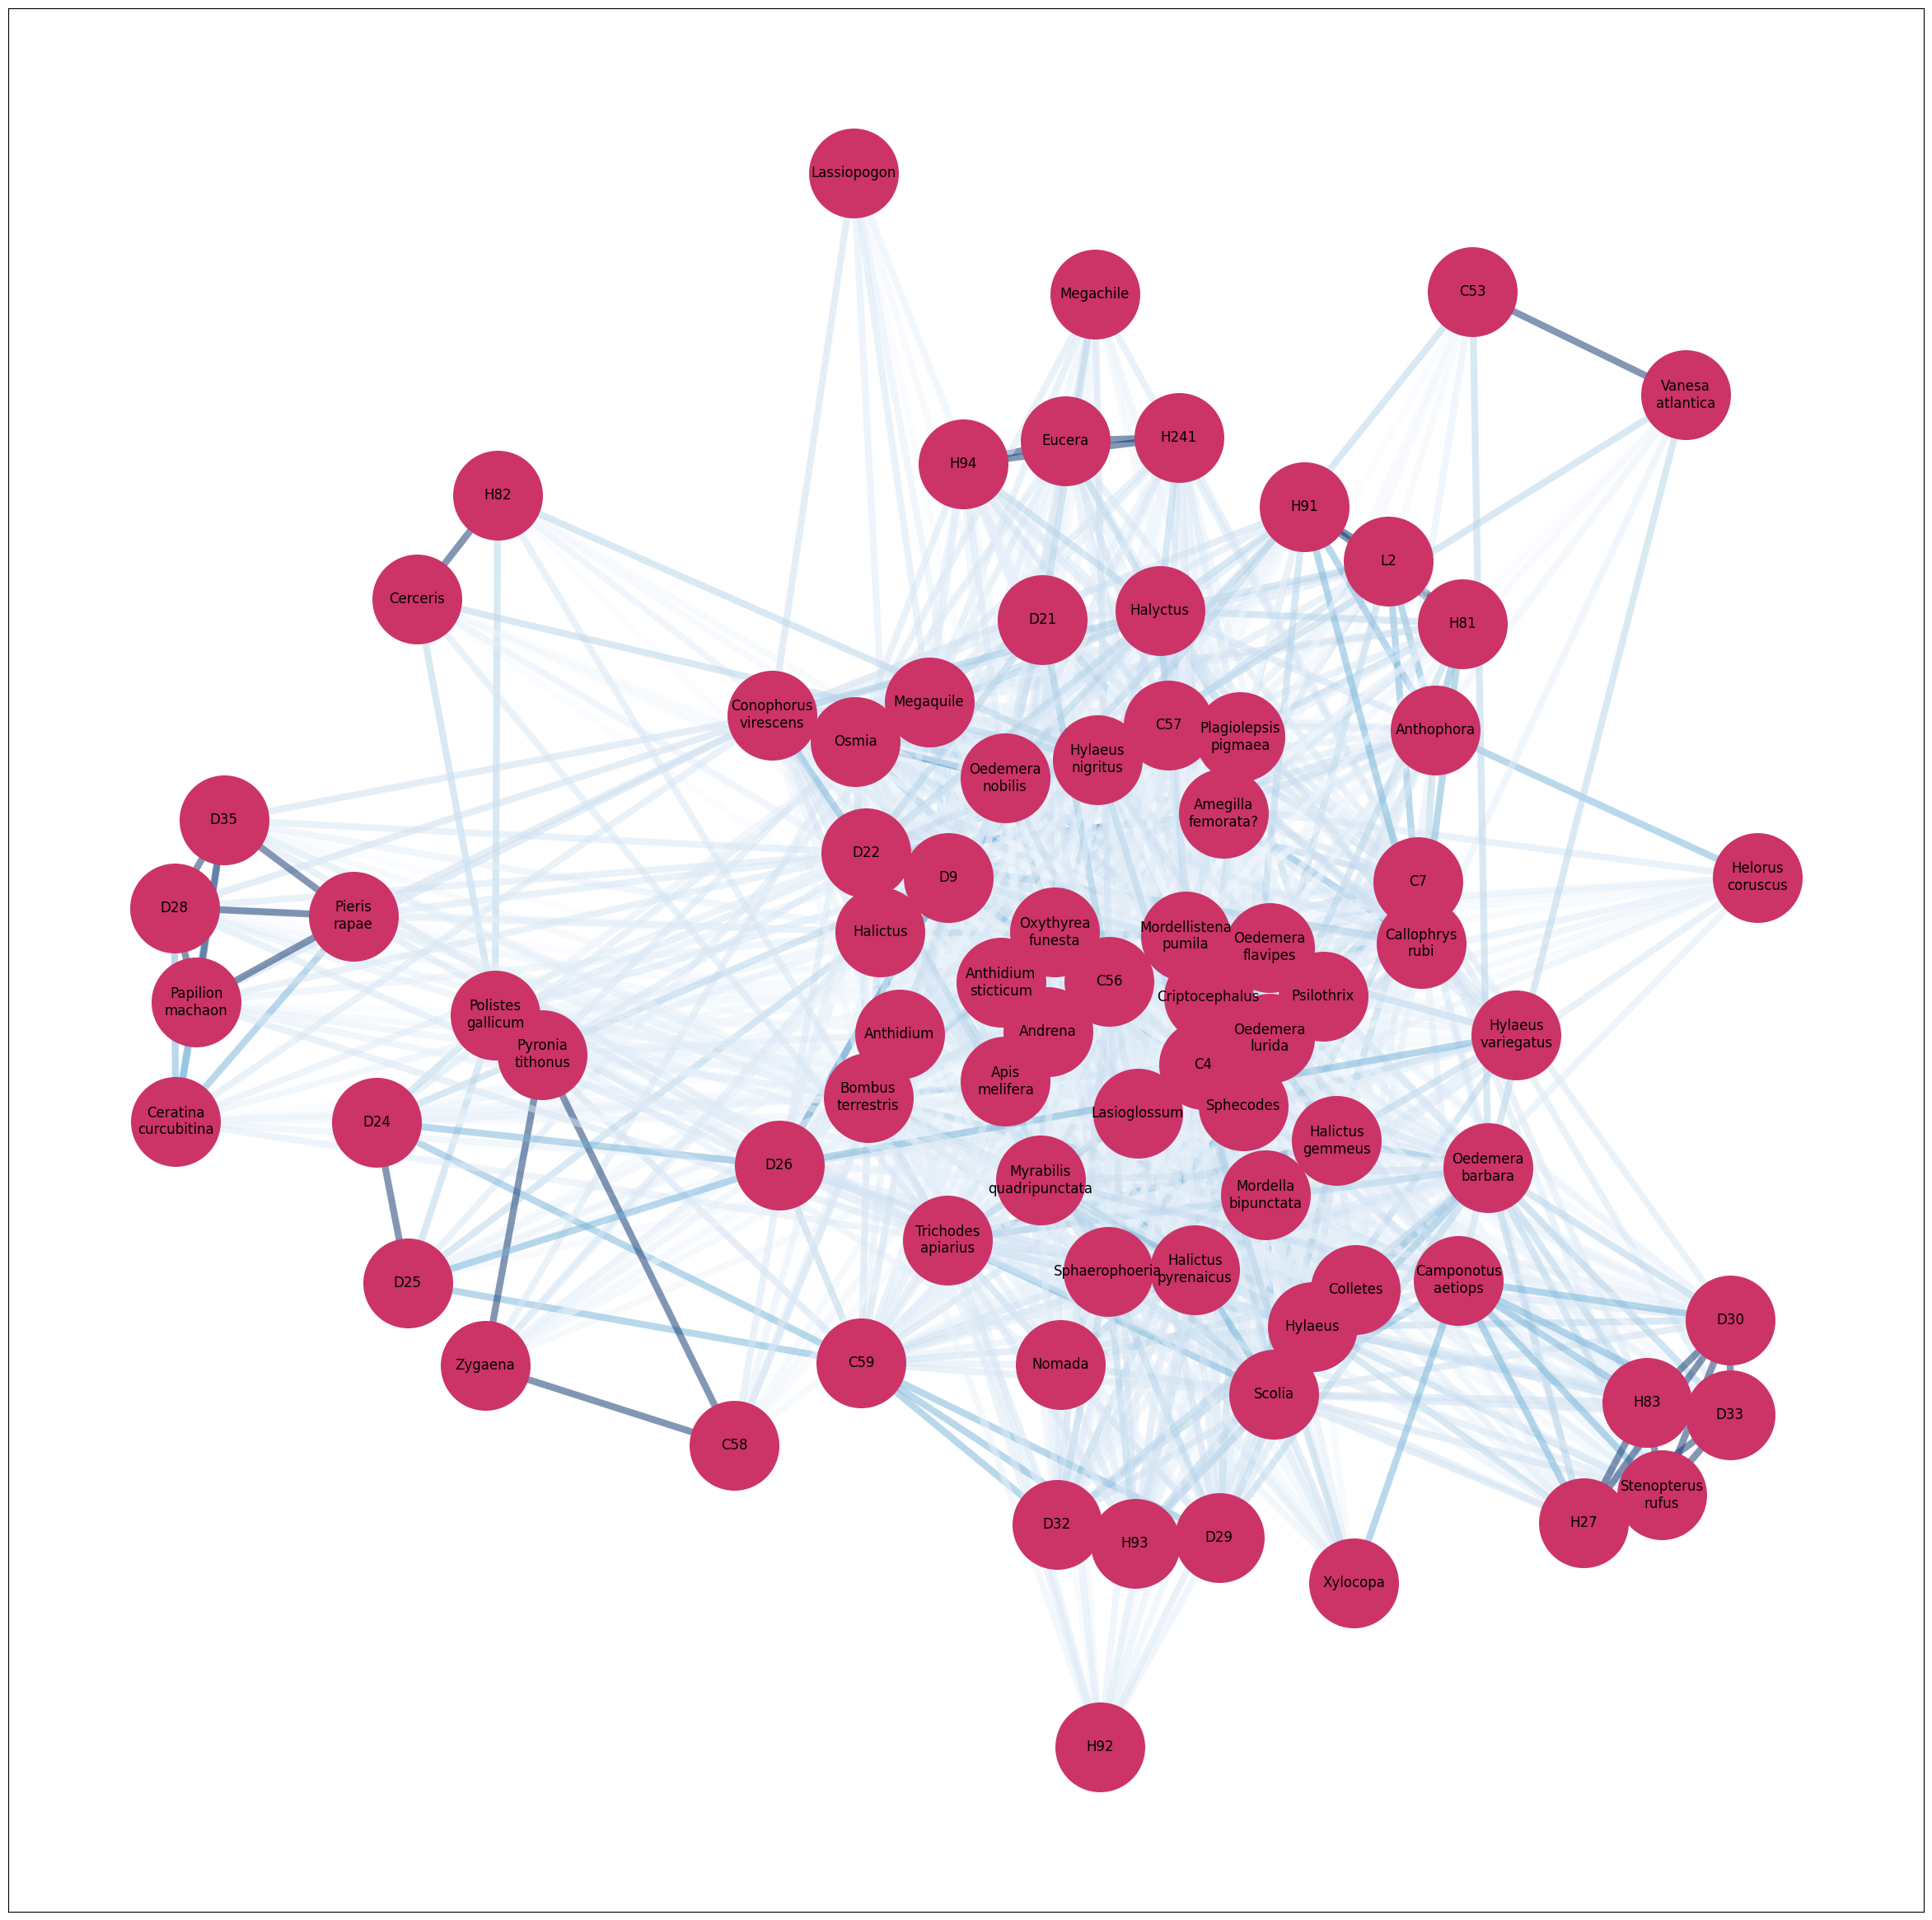

In [ ]:
# How to calculate Jaccard Index
# Create co-affiliation network
G = bipartite.overlap_weighted_projected_graph(B, pollinators)
# Get weights
weight = [G.edges[e]['weight'] for e in G.edges]
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues,
width=6, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#cc3366", node_size=6000)
nx.draw_networkx_labels(G, pos)